In [1]:
# %load CAViaR.py
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from quantreg import quantreg
from quantreg import yhat_my_self

import matplotlib.pylab as plt
import matplotlib.dates as mdate
from matplotlib.pylab import rcParams
plt.rcParams['axes.unicode_minus']=False
rcParams['font.sans-serif'] = 'kaiti'

In [2]:
df = pd.read_csv('.\indices_since95.csv')
indices = df['000001.SH']
indices = indices.values
indices = indices[0:-1]

p的值是：
[-0.09853193 -0.10643689  0.17438653 -0.0789224   0.07805301]
 final_simplex: (array([[-0.09853193, -0.10643689,  0.17438653, -0.0789224 ,  0.07805301],
       [-0.10337289, -0.10995373,  0.16647215, -0.08134609,  0.07613047],
       [-0.10112697, -0.11207425,  0.18335096, -0.07585734,  0.07557649],
       [-0.10949041, -0.10572006,  0.15421901, -0.07898468,  0.07921558],
       [-0.10205183, -0.10713556,  0.20255408, -0.077339  ,  0.07031438],
       [-0.0970449 , -0.10757222,  0.2201588 , -0.07634938,  0.07538211]]), array([4.43704928, 4.44899265, 4.45658456, 4.47086099, 4.47251736,
       4.47499407]))
           fun: 4.437049279357536
       message: 'Maximum number of iterations has been exceeded.'
          nfev: 19
           nit: 10
        status: 2
       success: False
             x: array([-0.09853193, -0.10643689,  0.17438653, -0.0789224 ,  0.07805301])


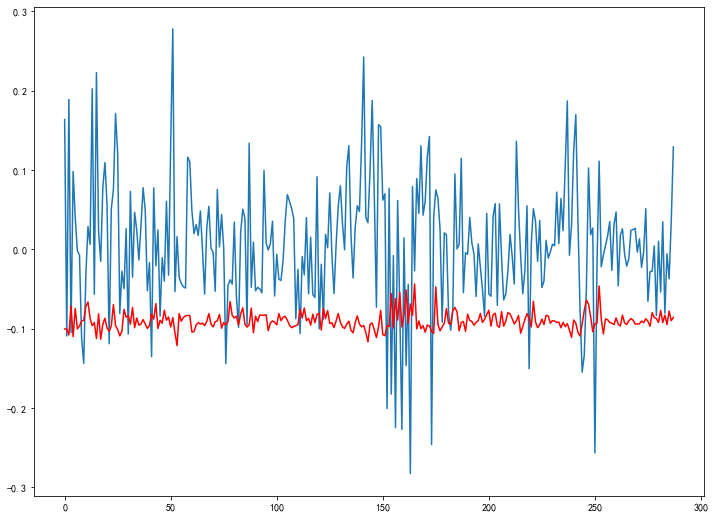

In [3]:
y = np.log(indices[1:])-np.log(indices[0:-1])

x_positive = np.abs(y[0:-1])*(y[0:-1]>0)
x_negative = np.abs(y[0:-1])*(y[0:-1]<0)

x = np.vstack((x_positive,x_negative))
y0 = y[1:]

tau = 0.1

p = quantreg(x,y0,tau)
print("p的值是：")
print(p.x)
print(p)
xf = x
x_ones = np.ones(len(xf[0,:]))
xf = np.vstack((x_ones,xf))
x_zeros = np.zeros(len(x[0,:]))
xf = np.vstack((xf,x_zeros))

yfit = yhat_my_self(p.x,xf)

fig = plt.figure(figsize=(12,9))
ax = plt.subplot(111)

ax.plot(y0)
ax.plot(yfit,'r')

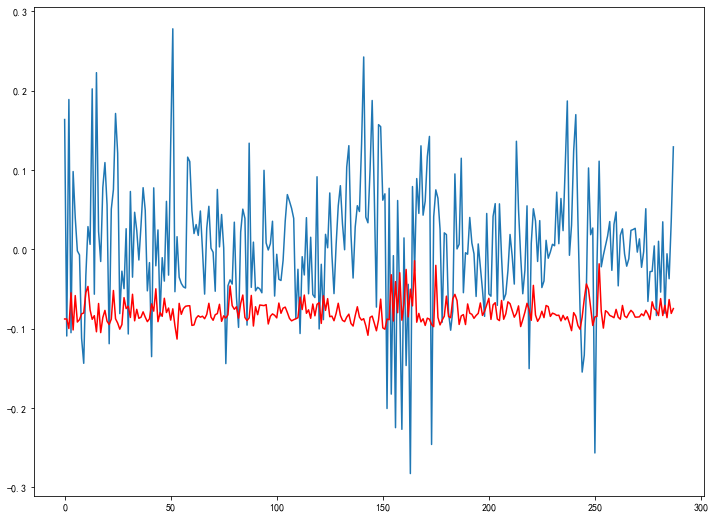

In [5]:
temp = np.array([-0.0887,-0.1083,0.2495,-0.0747,0.0689])

yfit = yhat_my_self(temp,xf)

fig = plt.figure(figsize=(12,9))
ax = plt.subplot(111)

ax.plot(y0)
ax.plot(yfit,'r')